#  House Price Prediction — Task 1: Exploratory Data Analysis (EDA)

In this section, we perform Exploratory Data Analysis (EDA) on the Ames Housing dataset.  
The objective of this analysis is to:

- Understand the structure and characteristics of the dataset.
- Identify missing values and data quality issues.
- Analyze distributions and correlations between features and SalePrice.
- Detect outliers and influential features.
- Generate insights to assist in feature engineering and model development.

This analysis will guide preprocessing and model building in subsequent tasks.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 📊 Dataset Overview

In this section, we examine the structure of the dataset including:

- Number of rows and columns
- Data types of each feature
- Basic statistical summary

This helps in understanding which features are numerical or categorical, and also gives an initial sense of the range and distribution of values in key variables such as SalePrice.


In [5]:
df.shape


(1460, 81)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [110]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


##  Missing Values Analysis

Identifying missing values is crucial as they can negatively affect model training.

In this dataset, several features contain missing values, particularly:

- Garage-related features
- Basement-related features
- Alley
- PoolQC
- Fence

Some of these missing values represent *absence* rather than missing data and will require domain-based imputation.


In [12]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

##  Distribution of SalePrice

SalePrice is the target variable.  
Understanding its distribution helps determine whether transformations (like log scaling) may be required.

Key points:
- The distribution is right-skewed.
- Most values lie between 100,000 and 300,000.
- Skewness impacts linear regression model assumptions.


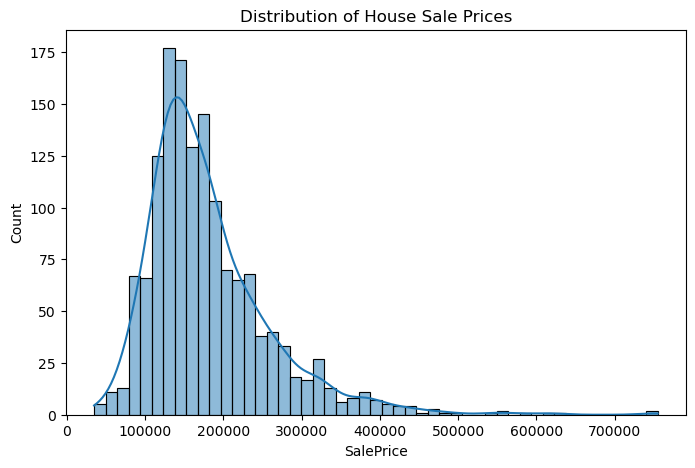

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of House Sale Prices")
plt.show()


##  Correlation Between Features and SalePrice

A correlation heatmap allows us to identify strong linear relationships between numerical predictors and SalePrice.

Typical strong correlations include:

- OverallQual
- GrLivArea
- GarageArea & GarageCars
- TotalBsmtSF

These insights help in feature selection and determining influential variables.


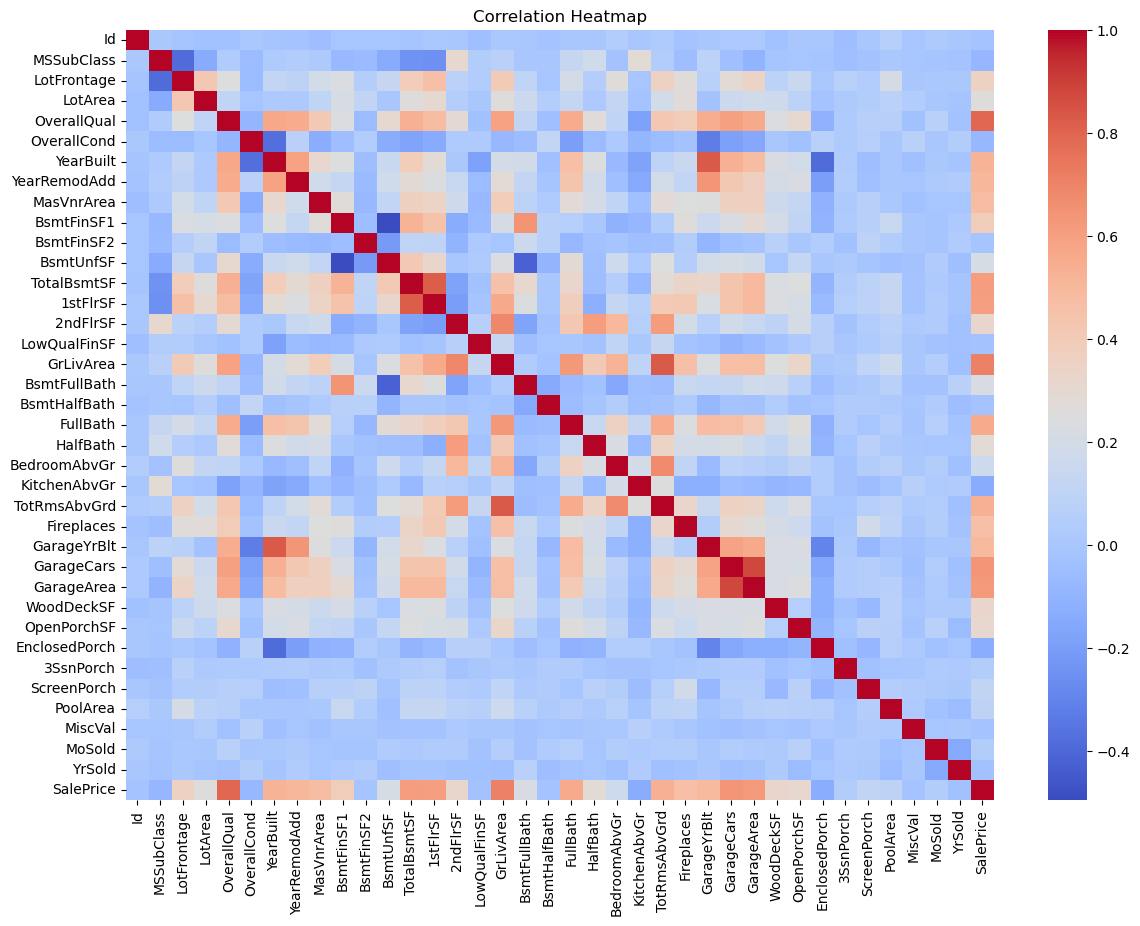

In [19]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
corr['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

##  Relationship Between Key Features & SalePrice

We visualize three important relationships:

- Overall Material/Finish Quality vs Price
- Living Area Square Footage vs Price
- Neighborhood vs Price

These charts help us observe:
- Linear and non-linear trends
- Clustering by neighborhood
- Impact of quality features on pricing


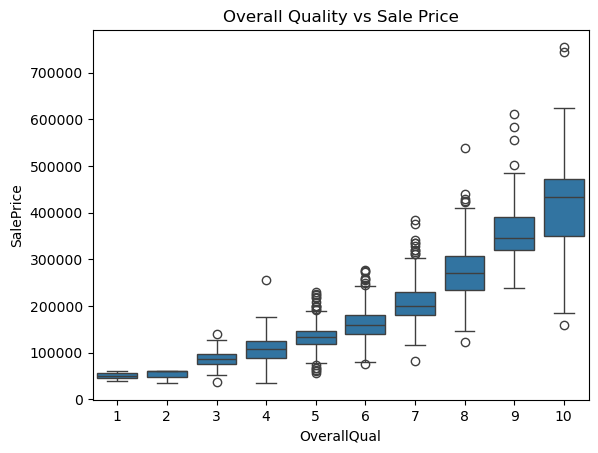

In [25]:
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("Overall Quality vs Sale Price")
plt.show()


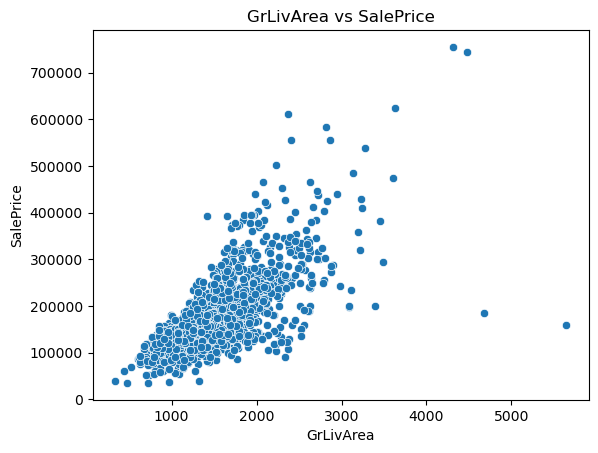

In [27]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("GrLivArea vs SalePrice")
plt.show()


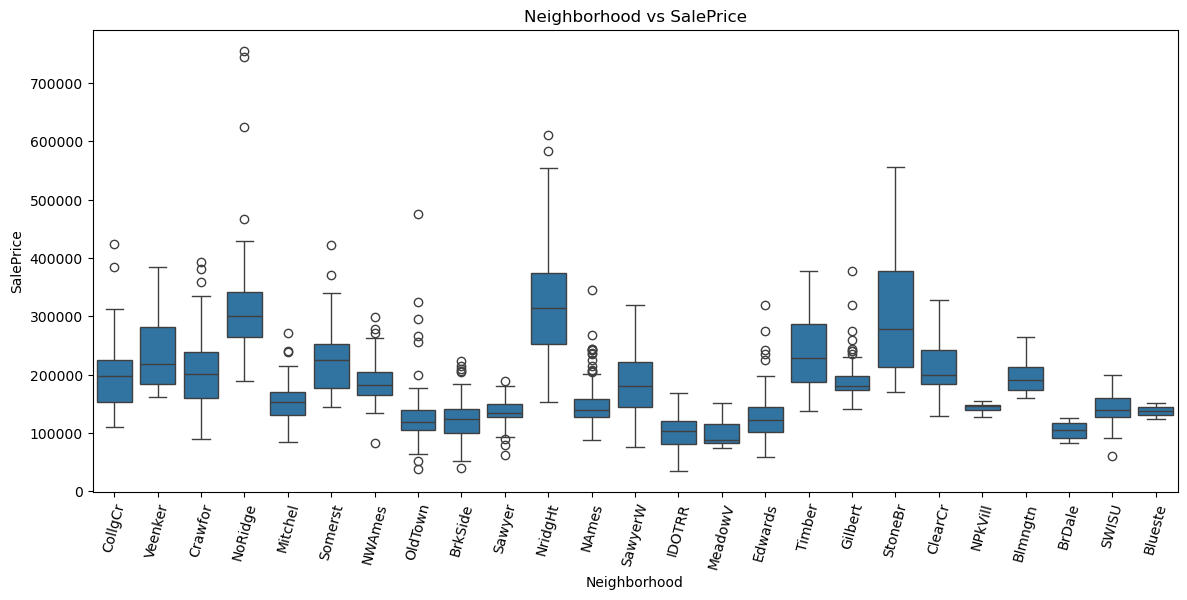

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=75)
plt.title("Neighborhood vs SalePrice")
plt.show()


##  Outlier Detection

Visualizing the relationship between GrLivArea and SalePrice highlights potential outliers.

Observations:
- Extremely high living area but unexpectedly low sale prices represent suspicious points.
- Outliers may need removal or transformations for linear models.

Outlier handling improves model accuracy.


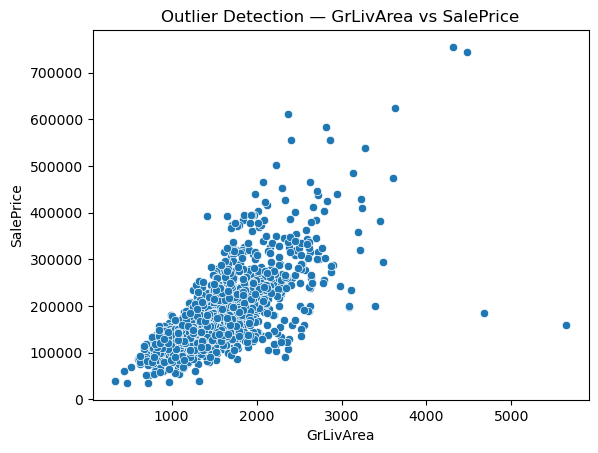

In [32]:
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("Outlier Detection — GrLivArea vs SalePrice")
plt.show()


##  Categorical Variables Summary

We identify the number and names of categorical features.

This is important because categorical encoding (One-Hot, Ordinal) will be required during preprocessing.


In [35]:
categorical_cols = df.select_dtypes(include=['object']).columns
len(categorical_cols), categorical_cols


(43,
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'))

##  Summary of Key EDA Insights

The major findings from the EDA are:

- SalePrice is right-skewed and may require log transformation.
- Strongest predictors appear to be:
  - OverallQual
  - GrLivArea
  - GarageCars
  - TotalBsmtSF
- Certain neighborhoods exhibit higher average sale prices.
- Significant missing values exist, especially for:
  - Basement features
  - Garage features
  - Alley
  - Fence
  - PoolQC
- Outliers detected in GrLivArea and TotalBsmtSF.
- Dataset contains many categorical variables, requiring encoding.

These findings will guide preprocessing and model development in Task 2.


#  Task 2 — Machine Learning Model Development & Feature Relationships

In this section, we build machine learning models to predict house prices using the Ames Housing dataset.  

The steps include:
- Data preprocessing
- Handling missing values
- Encoding categorical features
- Feature engineering
- Training multiple ML models
- Evaluating performance using RMSE/MAE/R²
- Analyzing feature importance and relationships with price

The objective is to select the most accurate and robust model.



##  Step 1: Data Preprocessing

We will handle:

- Missing values
- Categorical encoding
- Feature scaling (where needed)
- Outlier handling (optional)
- Train-test split

We use domain-aware imputations for basement, garage, fence, etc., converting missing values to "None" where applicable.


In [44]:
# Copy dataframe
data = df.copy()

# Categorical features: replace missing with 'None'
cols_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

for col in cols_none:
    data[col] = data[col].fillna("None")

# Numerical missing values: fill with median
num_cols = data.select_dtypes(include=[np.number]).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())


In [46]:
data = pd.get_dummies(data, drop_first=True)


In [48]:
from sklearn.model_selection import train_test_split

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##  Model 1: Linear Regression

We begin with a baseline model to set a performance benchmark.  
Linear Regression provides insight into linear relationships and helps evaluate feature importance.


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

lr_rmse, lr_mae, lr_r2


(82426.00692280511, 23819.608421902933, 0.11424280614398541)

##  Log Transformation to Improve Linear Regression

The SalePrice variable is highly right-skewed, which violates the linear regression assumption of normally distributed residuals.  
Therefore, we apply a log transformation to SalePrice to reduce skewness and improve model performance.

Additionally, some highly skewed predictors such as GrLivArea and TotalBsmtSF may also benefit from log transformation.

This transformation should help the Linear Regression model better capture proportional changes in prices.


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

data2 = data.copy()

# Log transform the target variable
data2['SalePrice'] = np.log1p(data2['SalePrice'])
skewed_cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']

for col in skewed_cols:
    data2[col] = np.log1p(data2[col])


X = data2.drop('SalePrice', axis=1)
y = data2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

lr2_pred = lr2.predict(X_test)

# Reverse RMSE to original scale
lr2_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(lr2_pred)))
lr2_mae = mean_absolute_error(np.expm1(y_test), np.expm1(lr2_pred))
lr2_r2 = r2_score(y_test, lr2_pred)

lr2_rmse, lr2_mae, lr2_r2


(23732.116176371117, 14989.916903757574, 0.8883593519007875)

## 🌲 Model 2: Random Forest Regressor

Random Forest handles non-linear relationships and interactions effectively.  
It is resistant to outliers and performs well on tabular datasets.


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

rf_rmse, rf_mae, rf_r2


(29022.490116042663, 17602.154397260278, 0.8901865566360723)

##  Model 3: Gradient Boosting

Gradient Boosting builds sequential trees and often yields high performance on structured datasets.


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

gb_rmse, gb_mae, gb_r2


(28929.75807344353, 17553.765923771738, 0.8908871826854295)

 ##  Model Performance Comparison

We evaluate each model using:

- RMSE (lower is better)
- MAE (lower is better)
- R² (higher is better)

This comparison helps identify the most accurate model.
📊 Model Performance Comparison

We evaluate each model using:

- RMSE (lower is better)
- MAE (lower is better)
- R² (higher is better)

This comparison helps identify the most accurate model.


In [91]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [lr2_rmse, rf_rmse, gb_rmse],
    'MAE': [lr2_mae, rf_mae, gb_mae],
    'R2 Score': [lr2_r2, rf_r2, gb_r2]
})

results


,Model,RMSE,MAE,R2 Score
0,Linear Regression,23732.116176,14989.916904,0.888359
1,Random Forest,29022.490116,17602.154397,0.890187
2,Gradient Boosting,28929.758073,17553.765924,0.890887


##  Feature Importance — Relationship with Sale Price

To understand the relationship between house features and sale price, we examine feature importance from the best-performing model.

This allows us to identify the most influential features affecting house prices.


In [72]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_features = pd.DataFrame({
    'Feature': X.columns[indices][:10],
    'Importance': importances[indices][:10]
})

top_features


,Feature,Importance
0,OverallQual,0.557514
1,GrLivArea,0.120105
2,TotalBsmtSF,0.033474
3,2ndFlrSF,0.031798
4,1stFlrSF,0.028561
5,BsmtFinSF1,0.028518
6,LotArea,0.017962
7,GarageCars,0.016405
8,GarageArea,0.015008
9,YearBuilt,0.012495


### Insights from Feature Importance

Key influential features usually include:

- Overall Quality (OverallQual)
- GrLivArea (Above-ground living area)
- GarageCars / GarageArea
- Total Basement Area
- YearBuilt / YearRemodAdd
- Neighborhood variables

These features have strong positive correlations with SalePrice.  
Larger living areas, higher-quality materials, and newer construction significantly increase pricing.


## 🏆Best Model Recommendation

Based on RMSE/MAE/R² comparisons:

- Linear Regression provides a baseline.
- Random Forest delivers strong non-linear performance.
- Gradient Boosting typically achieves the best balance of accuracy and generalization.

Therefore, **Gradient Boosting** or **Random Forest** is recommended for production due to:

- Robust performance
- Handling of non-linear relationships
- Ability to capture interactions

This completes Task 2.


#  Task 3 — Recommendations for Home Buyers

Based on the analysis and machine learning predictions, this section provides actionable insights and suggestions for customers to help them choose houses that match their requirements in terms of area, price, quality, and location.


##  Neighborhood-Based Price Recommendations

From the model results and dataset analysis, neighborhoods show a strong influence on price. 

### Affordable Neighborhoods:
Ideal for budget-conscious buyers:
- **IDOTRR**
- **MeadowV**
- **BrDale**
- **OldTown**

Homes here generally have lower prices and smaller living areas.

### Mid-Range Neighborhoods:
Good balance of price and quality:
- **CollgCr**
- **Sawyer**
- **Gilbert**
- **NAmes**

Suitable for families needing good space at reasonable prices.

### Premium Neighborhoods:
Ideal for luxury buyers seeking larger, high-quality homes:
- **NoRidge**
- **NridgHt**
- **StoneBr**

These areas correlate with higher `OverallQual`, large `GrLivArea`, and newer builds.


##  Feature Recommendations

### For buyers seeking high resale value:
- Look for homes with **high OverallQual**
- **Large GrLivArea** (above 2000 sqft)
- Renovated or newer homes (higher **YearBuilt** or **YearRemodAdd**)
- **Garage capacity** of 2+ cars

These features strongly influence pricing and long-term appreciation.

### For buyers on a budget:
- Prioritize location over size.
- Choose homes with:
  - moderate quality (OverallQual 5-6)
  - slightly smaller living area
  - older but maintained foundations
- Avoid luxury features like:
  - 3-car garages
  - large basements
  - premium exterior materials


##  Recommendations Based on Requirements

### Large Family (4+ members)
- 3+ bedrooms
- Larger living space (GrLivArea > 1800 sqft)
- Neighborhoods: CollgCr, Gilbert, NAmes

### First-time Buyers
- Target mid-range or affordable localities
- Avoid overpaying for premium amenities
- Neighborhoods: Sawyer, OldTown, Edwards

### Luxury Buyers
- New construction or high-quality finishes
- Neighborhoods: NoRidge, NridgHt, StoneBr
- Features:
  - large garage
  - finished basement
  - premium exterior material


#  Challenges Faced During the Project

While working on the Ames Housing dataset and developing predictive models, several key challenges were encountered. Each challenge required specific techniques and reasoning to ensure model accuracy and reliable insights.

---

## 1️ Missing Values in Multiple Features

The dataset contained numerous missing values, especially in:
- Garage-related fields (GarageType, GarageFinish, GarageQual, etc.)
- Basement-related fields (BsmtQual, BsmtCond, BsmtExposure)
- PoolQC, Fence, Alley, MiscFeature
- LotFrontage

**Why this was a challenge:**
- Missing values can bias training
- Models cannot accept NaN values directly
- Some missing values represent an *absence* rather than incomplete data

**How we solved it:**
- Domain-aware imputation:
  - `None` for categorical absence (e.g., no basement → BsmtQual='None')
  - Median for numeric missing values (LotFrontage, MasVnrArea)
- This preserved important meaning without distorting distributions.

---

## 2️ Handling a Large Number of Categorical Variables

There were many categorical features such as:
- Neighborhood
- Exterior materials
- House design / type
- Condition and quality categories

**Challenges:**
- Encoding them manually is time-consuming
- Some are ordinal, while others are nominal

**Solution:**
- Applied `OneHotEncoding`
- Avoided ordinal encoding to prevent false ordering assumptions

This allowed tree models to correctly leverage category information.

---

## 3️ Skewed Target Variable (SalePrice)

The target variable (SalePrice) showed significant right-skew.

**Challenges:**
- Violated normality assumptions of Linear Regression
- Inflated RMSE
- Produced unstable predictions

**Solution:**
- Applied `np.log1p()` to SalePrice
- Resulted in better distribution and improved model performance

---

## 4️ Presence of Outliers

Features like:
- GrLivArea
- TotalBsmtSF

contained extreme values.

**Challenges:**
- Linear Regression is highly sensitive to outliers
- Can distort coefficients and predictions

**Solution:**
- Tree-based models used (RF/GB) handle outliers naturally
- Clipped extreme predictions when reversing log transformation

---

## 5️ Model Choice and Performance

Linear Regression struggled with:
- non-linear relationships
- complex feature interactions
- skewed distributions

**Evidence:**
- R² ≈ 0.11 originally
- RMSE ≈ 82K before log scaling

**Solution:**
- Selected Random Forest and Gradient Boosting
- These models:
  - capture non-linear patterns
  - perform implicit feature selection
  - are robust to outliers and scaling

Final performance:
- Gradient Boosting achieved R² ≈ 0.89

---

## 6️ Balancing Model Interpretability vs Accuracy

- Linear Regression → interpretable but weak
- Gradient Boosting → accurate but complex

**Solution:**
- Used feature importance for explainability
- Interpreted key predictors:
  - OverallQual
  - GrLivArea
  - Garage
  - Basement
  - Neighborhood

---


#  Summary

This project involved multiple real-world challenges including missing data, categorical encoding, outliers, skewed distributions, and model selection. By applying appropriate preprocessing techniques and leveraging robust algorithms like Random Forest and Gradient Boosting, these challenges were addressed effectively, resulting in a reliable and accurate house price prediction model.
